In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

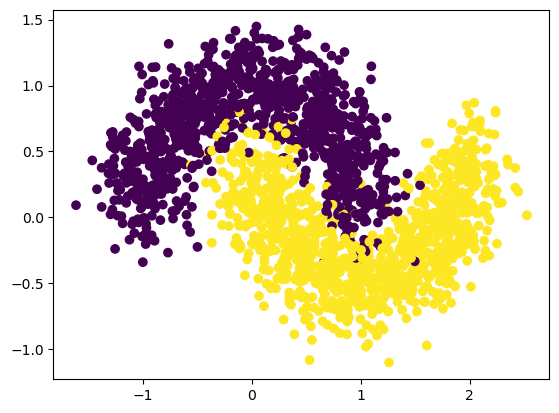

In [12]:
#Generating data for the model
def generate_data():
    #Make moons create data in crescent shape
    data=datasets.make_moons(n_samples=2000,noise=.2,random_state=1)
    plt.scatter(data[0].T[0],data[0].T[1],c=data[1])
    plt.show()

    return data

X,Y=generate_data()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [13]:
class LogisticReg:

    #Initial declaration of variables
    def __init__(self,rand=-1):
        self.weights=None
        self.rand=rand

    #Initialize weights
    def weights_initial(self,X):
        if self.rand!=-1:
            np.random.seed(self.rand)
        #Make as much weights as there are number of X
        self.weights=np.random.rand(X.shape[1])
    
    #Activator method for prediction of outcome
    def sigmoid(self,z):
        #Representation of [σ=1/1+e^-x]
        return 1/(1+np.exp(-z))

    #Gradient to reduce loss in the model
    def gradients(self,X,Y,y_pred):
        return np.dot(X.T,(Y-y_pred))
    
    #Loss function to determine performance of the model
    def loss_function(self,Y,y_pred):
        loss=1e-10
        y_pred=y_pred.clip(loss,1-loss)
        #Representation of [actual value * log(predicted_value) + (1 - actual value) *  log(1 - predicted_value)]
        return -np.mean(Y*np.log(y_pred)+(1-Y)*np.log(1-y_pred))
        
    def fit(self,X,Y,iters=15000,lr=0.001):
        if not self.weights:
            self.weights_initial(X)
        accured_loss=[]
        
        #Train the data
        for i in range(iters):
            z=np.dot(X,self.weights)
            y_pred=self.sigmoid(z)
            #Update the value of weights for each iteration
            self.weights=self.weights+lr*self.gradients(X,Y,y_pred)
            
            lss=self.loss_function(Y,y_pred)
            accured_loss.append(lss)

            if (i+1)%(iters//10)==0 | i==iters-1:
                print('Loss',loss)
        
        plt.plot(range(len(accured_loss)),accured_loss)
        plt.show()

    def predict(self,X):
        z=np.dot(X,self.weights)
        y_pred=self.sigmoid(z)
        return y_pred

    #Condition for thresholding predicted value as 0 or 1
    def binary_outcome(self,X):
        y_pred=self.predict(X)
        y_pred[y_pred>0.5]=1
        y_pred[y_pred<=0.5]=0
        return y_pred

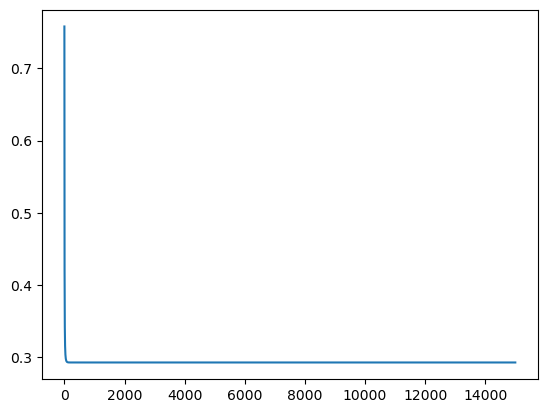

In [14]:
log_reg=LogisticReg(rand=1)
log_reg.fit(X_train,Y_train)

In [15]:
pred=log_reg.binary_outcome(X_test)
print('Accuracy Score',accuracy_score(pred,Y_test)*100)

Accuracy Score 85.25
